In [8]:
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('max_columns', None)

# Read sqlite query results into a pandas DataFrame
def qry(q, connection = sqlite3.connect("./database.sqlite")):
    df = pd.read_sql_query(q, connection)
    connection.close
    return df

In [5]:
# work w dataframes
df_user = qry("SELECT * FROM USER")
df_grade = qry("SELECT * FROM grade")
df_method = qry("SELECT * FROM method")
df_ascent = qry("SELECT * FROM ascent")

# get all desc. tabs..
desc_user = df_user.describe().T
desc_user['table'] = 'user'

desc_grade = df_grade.describe().T
desc_grade['table'] = 'grade'

desc_method = df_method.describe().T
desc_method['table'] = 'method'

desc_ascent = df_ascent.describe().T
desc_ascent['table'] = 'ascent'

pd.set_option('display.float_format', lambda x: '%.4f' % x)
desc_user.append(desc_grade).append(desc_method).append(desc_ascent)

,count,mean,std,min,25%,50%,75%,max,table
id,62593.0000,33106.4069,19373.4078,1.0000,16325.0000,32721.0000,49980.0000,67025.0000,user
sex,62593.0000,0.1551,2.0665,0.0000,0.0000,0.0000,0.0000,255.0000,user
height,62593.0000,83.8842,88.1554,0.0000,0.0000,0.0000,176.0000,255.0000,user
weight,62593.0000,33.1219,35.0836,0.0000,0.0000,0.0000,68.0000,100.0000,user
started,62593.0000,1071.6877,999.5699,0.0000,0.0000,1992.0000,2006.0000,2090.0000,user
deactivated,62593.0000,0.0409,0.1981,0.0000,0.0000,0.0000,0.0000,1.0000,user
anonymous,62593.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,user
id,83.0000,42.8675,25.1113,1.0000,21.5000,42.0000,64.5000,86.0000,grade
score,83.0000,617.5301,517.0857,0.0000,110.0000,550.0000,1062.5000,1575.0000,grade
fra_routes_input,83.0000,0.4940,0.5030,0.0000,0.0000,0.0000,1.0000,1.0000,grade


In [6]:
df_user = df_user.rename(columns = {'id':'user_id'})
df_ascent = df_ascent.rename(columns = {'id':'ascent_id'})
df_grade = df_grade.rename(columns = {'id':'grade_id'})

In [13]:
df_ascent[df_ascent.crag == 'Smith Rocks']

,ascent_id,user_id,grade_id,notes,raw_notes,method_id,climb_type,total_score,date,year,last_year,rec_date,project_ascent_date,name,crag_id,crag,sector_id,sector,country,comment,rating,description,yellow_id,climb_try,repeat,exclude_from_ranking,user_recommended,chipped
689,1011,28,59,,0,1,0,950,922316400,1999,0,1107126000,0,Churning in the wake,11610,Smith Rocks,0,,USA,Brilliant,3,,255,0,0,0,0,0
690,1012,28,53,,0,3,0,945,954108000,2000,0,1107126000,0,Don't remember,11610,Smith Rocks,0,,USA,,0,,0,0,0,0,0,0
1483,2226,168,68,,0,1,0,1150,972165600,2000,0,1107126000,0,to bolt or not to be,11610,Smith Rocks,0,,USA,,3,,0,0,0,0,0,0
1484,2227,168,64,,0,3,0,1195,971992800,2000,0,1107126000,0,Rude boys,11610,Smith Rocks,0,,USA,,3,,255,0,0,0,0,0
1485,2228,168,59,,0,3,0,1095,971992800,2000,0,1107126000,0,Churning in the wake,11610,Smith Rocks,0,,USA,,2,,255,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4090528,4885532,46004,36,"Traditional, Hard",20,3,0,575,1502316000,2017,1,1503833343,0,Quasar,11610,Smith Rocks,4832,Lower Gorge,USA,,3,,0,0,0,0,0,0
4090529,4885533,46004,38,"Traditional, Hard",20,1,0,480,1502402400,2017,1,1503833470,0,Cornercopia,11610,Smith Rocks,4832,Lower Gorge,USA,,3,,0,0,0,0,0,0
4090542,4885552,46004,31,Traditional,4,1,0,330,1502316000,2017,1,1503834313,0,The Ferret's dead,11610,Smith Rocks,4832,Lower Gorge,USA,,2,,0,0,0,0,0,0
4096307,4892345,66619,38,,0,3,0,595,1490997600,2017,1,1504121675,0,Caffine Free,11610,Smith Rocks,0,,USA,,0,,255,0,0,0,0,0


In [51]:
df_ascent['grade_id'].loc[df_ascent.name == 'Left slab crack'].value_counts()

Series([], Name: grade_id, dtype: int64)

In [68]:
fr_grade = {13:'3a',
            21:'4a',
            23:'4b',
            25:'4c',
            29:'5a',
            31:'5b',
            33:'5c',
            36:'6a',
            38:'6a+',
            40:'6b',
            42:'6b+',
            44:'6c',
            46:'6c+',
            49:'7a',
            51:'7a+',
            53:'7b',
            55:'7b+',
            57:'7c',
            59:'7c+',
            62:'8a',
            64:'8a+',
            66:'8b',
            68:'8b+',
            70:'8c',
            72:'8c+'}

yds_grade ={13:'4',
            21:'5',
            23:'6',
            25:'7',
            29:'8',
            31:'9',
            33:'10a',
            36:'10b',
            38:'10c',
            40:'10d',
            42:'11a',
            44:'11b',
            46:'11c',
            49:'11d',
            51:'12a',
            53:'12b',
            55:'12c',
            57:'12d',
            59:'13a',
            62:'13b',
            64:'13c',
            66:'13d',
            68:'14a',
            70:'14b',
            72:'14c',
            74:'14d',
            75:'15a'}

In [107]:
df_h_smith = df_ascent[df_ascent['grade_id']>50].loc[df_ascent['crag']=='Smith Rocks'].copy()
df_e_smith = df_ascent[df_ascent['grade_id']<50].loc[df_ascent['crag']=='Smith Rocks'].copy()
df_smith = df_ascent[df_ascent['crag']=='Smith Rocks'].copy()

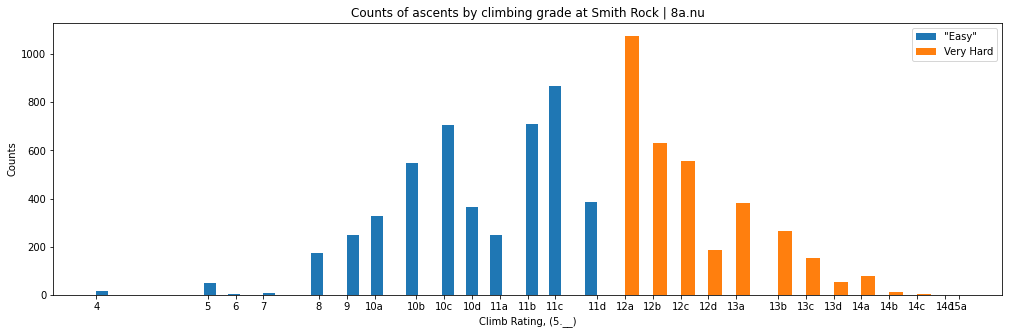

In [166]:
plt.figure(figsize=[17,5])
plt.hist(df_e_smith['grade_id'],bins=len(df_e_smith['grade_id'].unique())*3,label='\"Easy\"')
plt.hist(df_h_smith['grade_id'],bins=len(df_h_smith['grade_id'].unique())*2,label='Very Hard')
#locs = sorted(df_h_smith['grade_id'].unique())
locs = list(yds_grade.keys())
plt.xticks(ticks=locs,labels=[yds_grade[x] for x in locs])
plt.title('Counts of ascents by climbing grade at Smith Rock | 8a.nu')
plt.xlabel('Climb Rating, (5.__)')
plt.ylabel('Counts')


plt.legend();

plt.savefig('SmithAscentsByGrade.png',bbox_inches='tight')
plt.show()

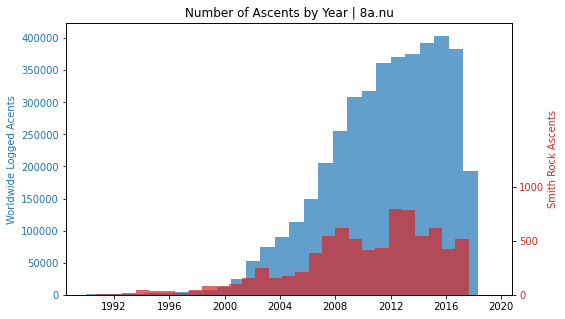

In [167]:
smith_dates = pd.to_datetime(df_smith.date,unit='s')
all_dates = pd.to_datetime(df_ascent.date,unit='s')

fig, ax = plt.subplots()
fig.set_size_inches([8,5])
color = 'tab:blue'
ax.hist(all_dates[all_dates > '1990-01-01'],bins=2018-1990, alpha=.7,label='All Ascents')
ax.set_ylabel('Worldwide Logged Acents',color=color)
ax.tick_params(axis='y', labelcolor=color)

ax2 = ax.twinx()
color = 'tab:red'
ax2.hist(smith_dates[smith_dates > '1990-01-01'],bins=2018-1990, alpha=.7, color = 'tab:red', label='Smith Rock Ascents')
ax2.set_ylabel('Smith Rock Ascents', color=color)
ax2.tick_params(axis='y', labelcolor=color)
ylim = ax2.get_ylim()
ax2.set_ylim([ylim[0],ylim[1]*3])
yticks = ax2.get_yticks()
ax2.set_yticks(yticks[:3])

ax2.set_title('Number of Ascents by Year | 8a.nu');

plt.savefig('AllAscentsByYear.png',bbox_inches='tight')
plt.show()